In [87]:
# Clustering for dataset containing features for wine form 3 different vineyards
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [88]:
# Retrieve dataset for clustering
path = 'datasets/'
file = 'Country-data.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df = df.set_index(['country'])
print(df.head())
print(df.shape)
print(df.keys())

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  
(167, 9)
Index(['child_mort', 'exports', 'health', 'imports', 'income', 'in

In [89]:
# Create a KMeans instance with 3 clusters, although the labels can be predicted without 
# specifying the number of clusters
n_clusters_pred = 3
kmeans = KMeans(n_clusters=n_clusters_pred)
#kmeans = KMeans()
print('Created kmeans for clustering.')

Created kmeans for clustering.


In [90]:
# Fit the KMeans clustering model to the data
kmeans.fit(df)
print('Fitted kmeans.')

Fitted kmeans.


/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [91]:
# Get the cluster labels for each data point,
# these are the labels assigned by kmeans
labels = kmeans.labels_

In [92]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_
#print(cluster_centers)

Inertia: 21710210039.754135
Silhouette Score: 0.7003508054481694 . Best:1, worst: -1.


/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/sklearn/

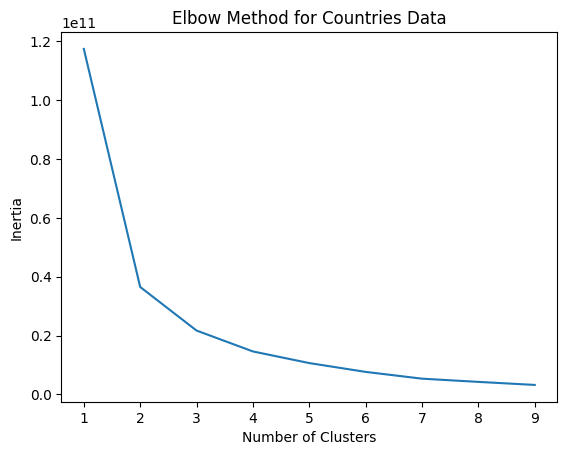

The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.


In [93]:
#evaluate the model

#compare inertia between models or numbers of clusters,
#lower inertia means a better fit.
inertia = kmeans.inertia_
print("Inertia:", inertia)

#silhouette is a metric in which the best value is 1 and the worst is -1
silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg,'. Best:1, worst: -1.')

# Elbow method is used for determining the best number of clusters to use,
# the value of k where the curve begins a slower descent is the number of
# clusters that should be used

inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Countries Data")
plt.show()
print('The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.')

/home/malpizar/Documents/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


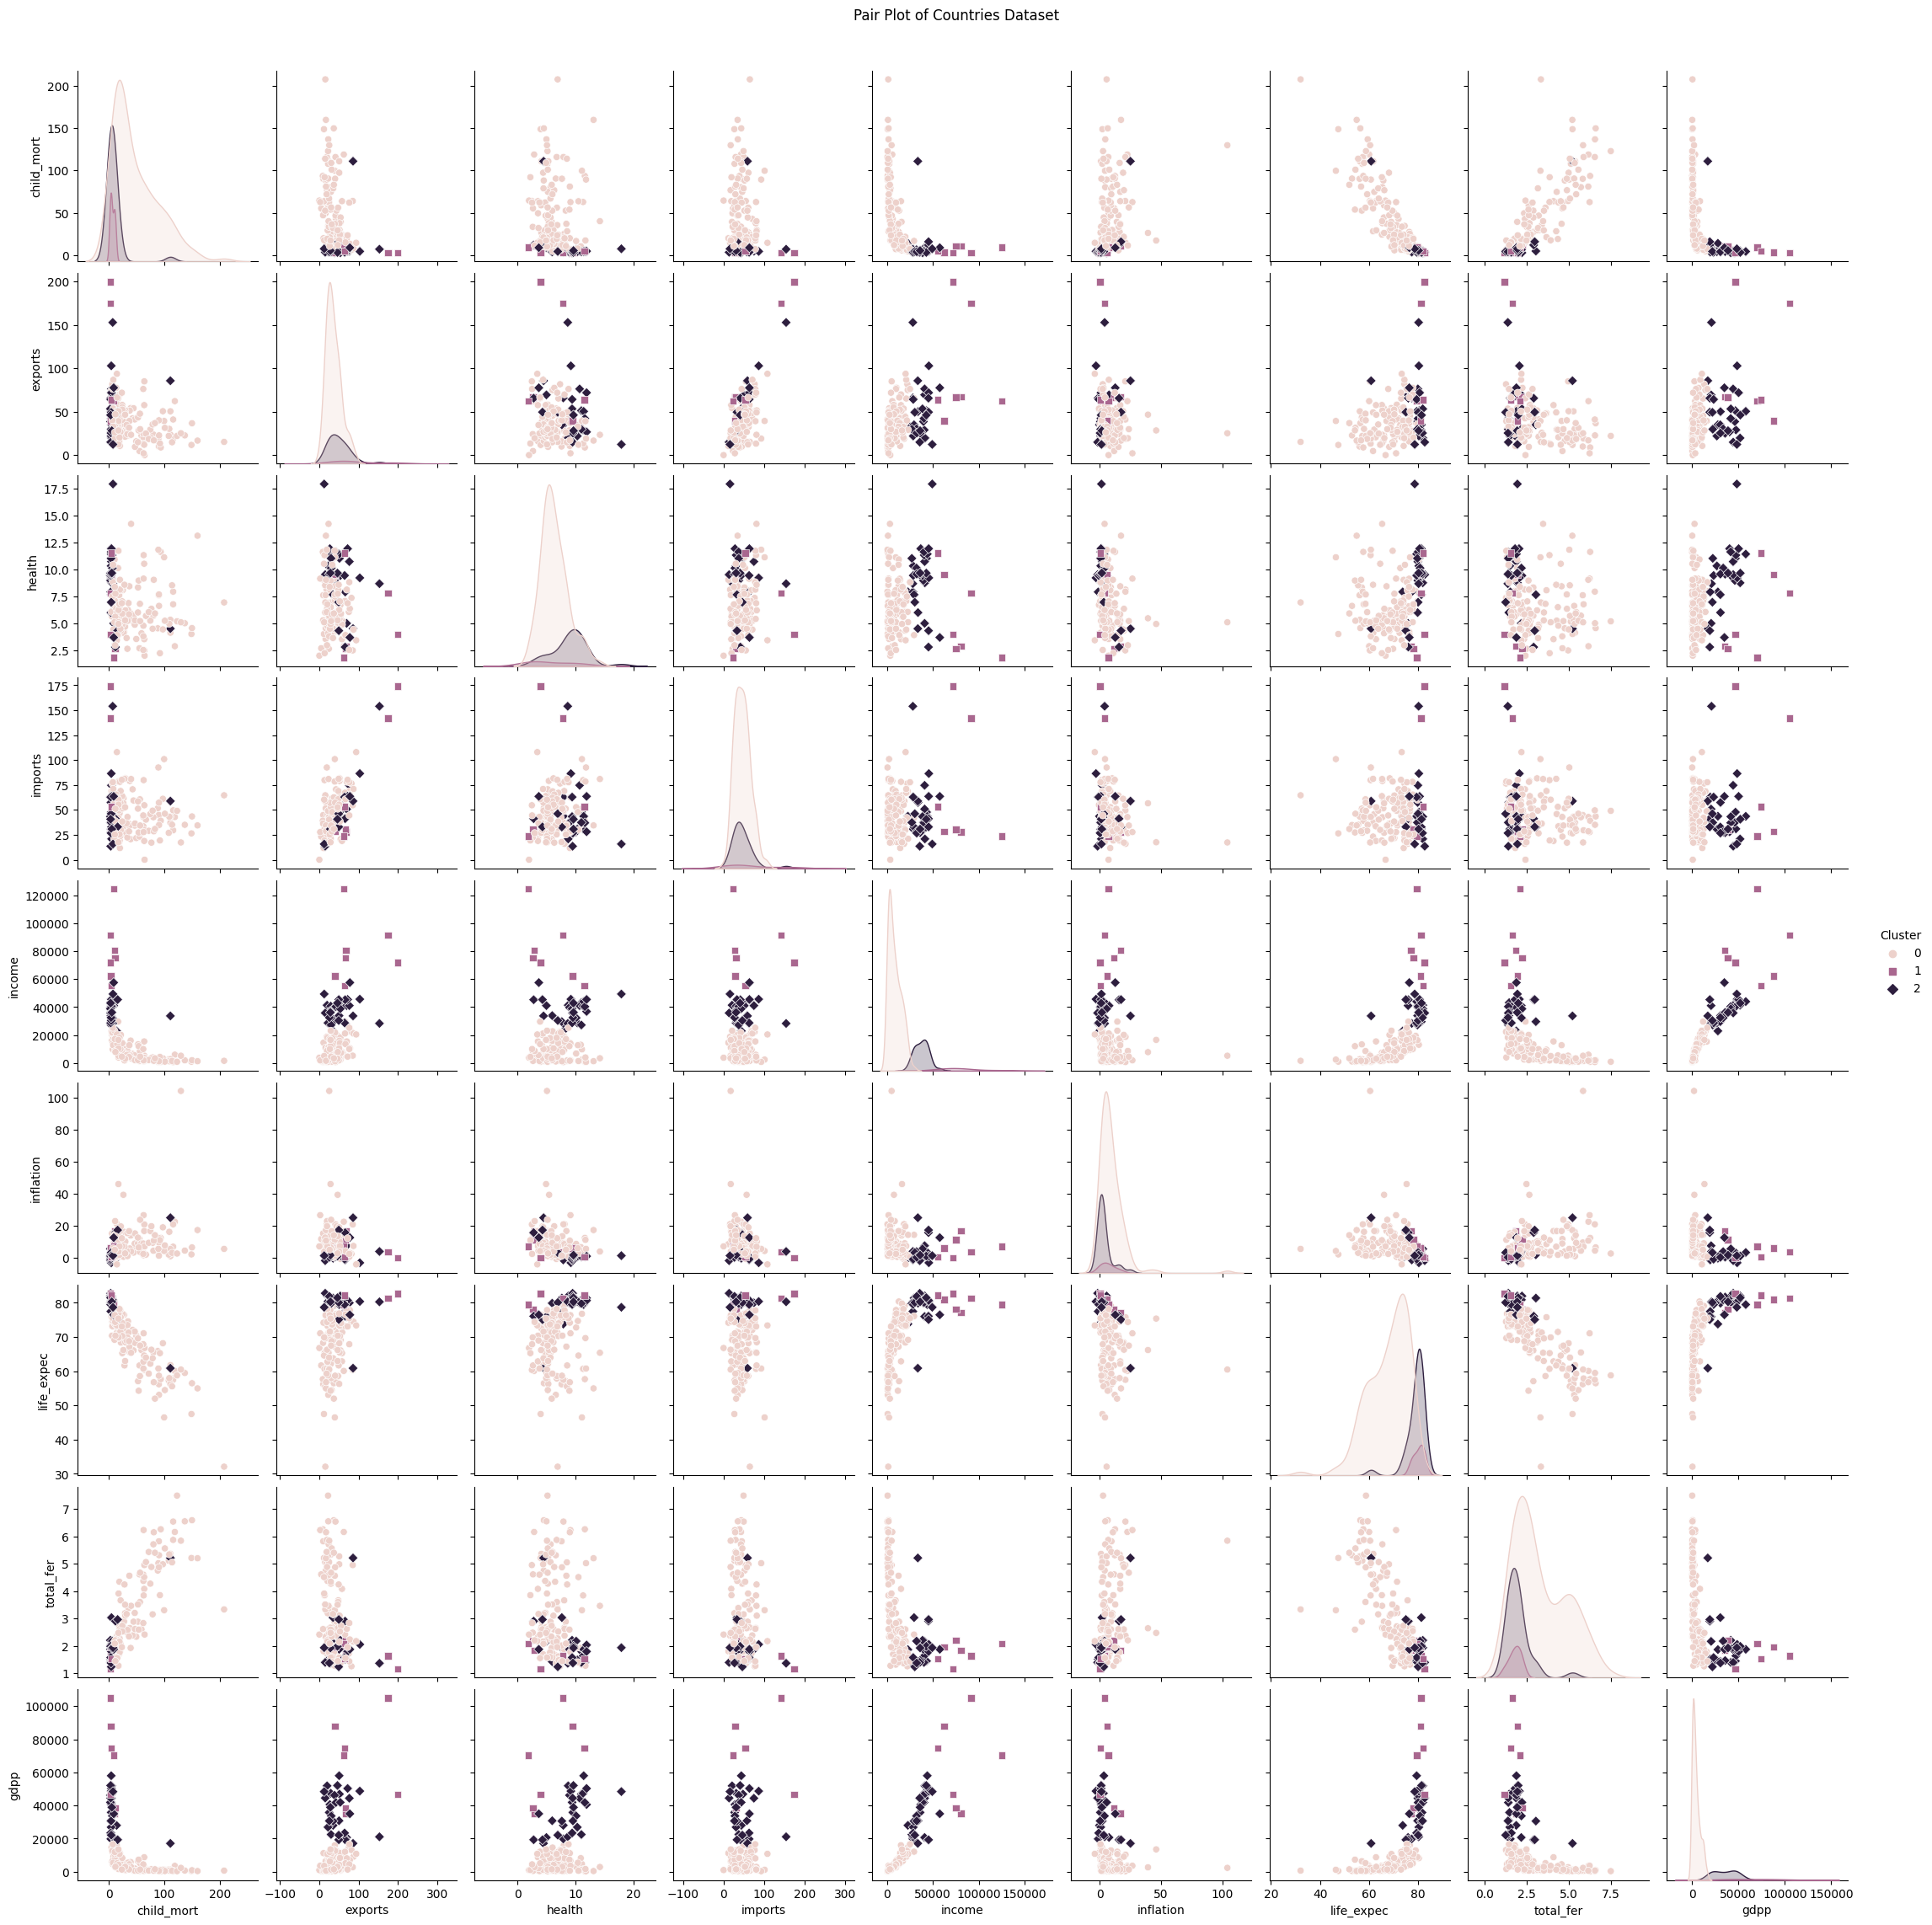

In [94]:
#look for features with a high separation between labels to do a scatter plot

# Create a DataFrame with the data and cluster labels
data = pd.DataFrame(df, columns=df.keys())
data['Cluster'] = labels

# Create pair plots
sns.pairplot(data, hue='Cluster', markers=['o', 's', 'D'])

# Add a title
plt.suptitle("Pair Plot of Countries Dataset", y=1.02)

# Display the plots
plt.show()

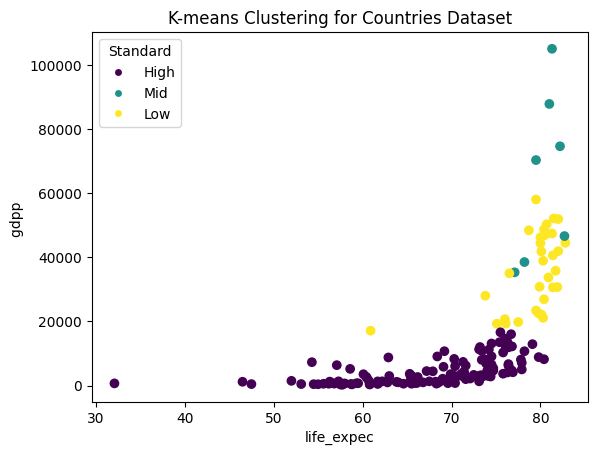

In [95]:
# Visualize the clusters and cluster centers in a pair of variables that provides good separation
scatter = plt.scatter(data['life_expec'], data['gdpp'], c=labels, cmap='viridis')
plt.xlabel('life_expec')
plt.ylabel('gdpp ')
plt.title('K-means Clustering for Countries Dataset')

# Get unique cluster labels
unique_labels = set(labels)

# Create a dictionary to name the clusters as A, B, C
label_mapping = {0: 'High', 1: 'Mid', 2: 'Low'}

# Create custom legend entries for each cluster
legend_entries = [Line2D([0], [0], marker='o', color='w', label=f'{label_mapping[label]}', 
                         markerfacecolor=scatter.cmap(scatter.norm(label)))
                  for label in unique_labels]

plt.legend(handles=legend_entries, title='Standard', loc='upper left')
plt.show()

In [106]:
# Define the label you want to find
target_label = 0

# Filter the DataFrame to get names with the target label
names_with_target_label = data[data['Cluster'] == target_label].index

# Convert the result to a list if needed
names_list = names_with_target_label.tolist()

# Print the names
print("Countries with label", target_label, ":", names_list)

print(data['Cluster'].value_counts())

Names with label 0 : ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts

In [103]:
name = 'Costa Rica'

print('Predicted cluster of '+name+': '+ str(int(data.loc[name]['Cluster']))+'.')

Predicted cluster of Costa Rica: 0.
